# Orcid Adoption in Ireland
*by Neil Tynan @ATU*

![ORCiD](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.infodocket.com%2Fwp-content%2Fuploads%2F2020%2F11%2F1200px-ORCID_logo.svg_.png&f=1&nofb=1&ipt=deaeedbc3fcf61e94115e9f869a818bc3bc936d6d83f98f831c3669dd21c1e63&ipo=images)
###### *“Logo provided by ORCiD and used in line with the ORCID Brand Guidelines”*

This assignment looks at something probably.

## Import Libraries
---

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import requests

## Data
---

In [5]:
# Science Foundation Ireland Grant Committment List
url = "https://www.sfi.ie/about-us/governance/open-data/Open-Data-2023-11-30.csv"
sfi = pd.read_csv(url)


## Examining the Data
---

In [6]:
sfi.head(3)

,Proposal ID,Programme Name,Sub-Programme,Supplement,Lead Applicant,ORCID,Research Body,Research Body ROR ID,Funder Name,Crossref Funder Registry ID,Proposal Title,Start Date,End Date,Current Total Commitment
0,00/PI.1/B038,SFI Principal Investigator Programme,NaN,NaN,Seamus Martin,https://orcid.org/0000-0002-8539-3143,Trinity College Dublin (TCD),https://ror.org/02tyrky19,Science Foundation Ireland,10.13039/501100001602,Establishing functional proteomic maps of prot...,2001-10-01,2007-03-31,5471668.03
1,00/PI.1/B045,SFI Principal Investigator Programme,NaN,NaN,Kingston Mills,https://orcid.org/0000-0003-3646-8222,Trinity College Dublin (TCD),https://ror.org/02tyrky19,Science Foundation Ireland,10.13039/501100001602,Pathogen-derived immunomodulatory molecules: f...,2001-10-01,2006-12-04,8069351.7
2,00/PI.1/B045s1,SFI Equipment Call,NaN,Equipment Supplement,Kingston Mills,https://orcid.org/0000-0003-3646-8222,Trinity College Dublin (TCD),https://ror.org/02tyrky19,Science Foundation Ireland,10.13039/501100001602,Equipment Supplement,2004-11-01,2005-04-30,387200


In [7]:
sfi.tail(3)

,Proposal ID,Programme Name,Sub-Programme,Supplement,Lead Applicant,ORCID,Research Body,Research Body ROR ID,Funder Name,Crossref Funder Registry ID,Proposal Title,Start Date,End Date,Current Total Commitment
6935,TRA/2011/15,HRB-SFI Translational Research Award,NaN,NaN,Timothy O'Brien,https://orcid.org/0000-0001-9028-5481,Health Research Board (HRB),https://ror.org/003hb2249,Science Foundation Ireland,10.13039/501100001602,Limb salvage using mesenchymal stem cell induc...,2014-05-01,2017-06-30,525734.3
6936,TRA/2011/19,HRB-SFI Translational Research Award,NaN,NaN,Fergal O'Brien,https://orcid.org/0000-0003-2030-8005,Health Research Board (HRB),https://ror.org/003hb2249,Science Foundation Ireland,10.13039/501100001602,Translation of novel strategies for joint repa...,2012-07-01,2017-06-30,640504
6937,TRA/2011/33,HRB-SFI Translational Research Award,NaN,NaN,Paul McLoughlin,https://orcid.org/0000-0001-6200-016X,Health Research Board (HRB),https://ror.org/003hb2249,Science Foundation Ireland,10.13039/501100001602,Targeting gremlin in the diagnosis and treatme...,2013-05-01,2017-04-30,205934.5


In [8]:
sfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6938 entries, 0 to 6937
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Proposal ID                  6938 non-null   object
 1   Programme Name               6938 non-null   object
 2   Sub-Programme                2307 non-null   object
 3   Supplement                   1257 non-null   object
 4   Lead Applicant               6938 non-null   object
 5   ORCID                        5169 non-null   object
 6   Research Body                6938 non-null   object
 7   Research Body ROR ID         6637 non-null   object
 8   Funder Name                  6938 non-null   object
 9   Crossref Funder Registry ID  6938 non-null   object
 10  Proposal Title               6936 non-null   object
 11  Start Date                   6938 non-null   object
 12  End Date                     6938 non-null   object
 13   Current Total Commitment    6938

In [9]:
sfi['Start Date'] = pd.to_datetime(sfi['Start Date'])
sfi['End Date'] = pd.to_datetime(sfi['End Date'])
sfi[' Current Total Commitment '] = sfi[' Current Total Commitment '].astype(str)

## ORCID adoption amoung SFI researchers
---

In [10]:
OID = sfi['ORCID']
OID

0       https://orcid.org/0000-0002-8539-3143
1       https://orcid.org/0000-0003-3646-8222
2       https://orcid.org/0000-0003-3646-8222
3       https://orcid.org/0000-0003-4992-4979
4                                         NaN
                        ...                  
6933    https://orcid.org/0000-0001-5445-1016
6934    https://orcid.org/0000-0002-7871-6477
6935    https://orcid.org/0000-0001-9028-5481
6936    https://orcid.org/0000-0003-2030-8005
6937    https://orcid.org/0000-0001-6200-016X
Name: ORCID, Length: 6938, dtype: object

In [11]:
OIN = OID.isna()
OINS = OIN.sum()
print("Number of SFI Reseachers without an ORCiD:", OINS)

ONN = OID.notnull()
ONNS = ONN.sum()
print("Number of SFI Reseachers with an ORCiD:", ONNS)


Number of SFI Reseachers without an ORCiD: 1769
Number of SFI Reseachers with an ORCiD: 5169


Text(0.5, 1.0, 'Percentage of Historical SFI Grant Holders with an ORCiD')

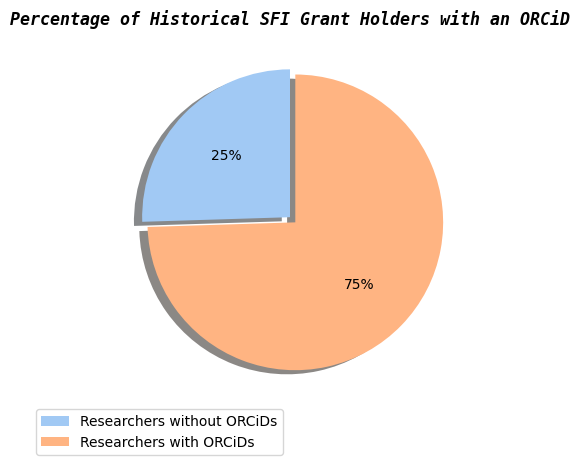

In [15]:
#define data
data = [OINS, ONNS]
labels = ['Researchers without ORCiDs', 'Researchers with ORCiDs']
explode = (0, 0.05)

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, explode=explode, colors = colors, autopct='%.0f%%', shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)
plt.legend(labels, loc='best', bbox_to_anchor=(0, 0., 0.5, 0))
plt.title('Percentage of Historical SFI Grant Holders with an ORCiD', fontweight='bold', style='italic', family='monospace', loc = 'center') 


In [38]:
# Grouping the data into date blocks for analysis
SD = sfi['Start Date']
ONNY = ONN.groupby(SD.dt.year).sum()
OINY = OIN.groupby(SD.dt.year).sum()

# Adding in date ranges for analysis
dateFrom = "2000"
dateTo = "2023"

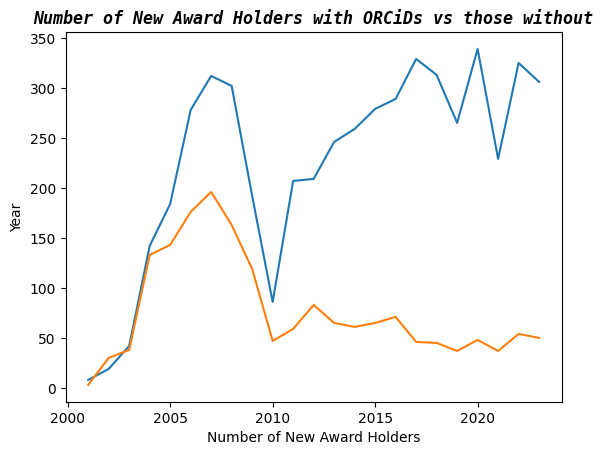

In [37]:
# Charting the ORCiD data

plt.plot(ONNY.loc[dateFrom:dateTo])
plt.plot(OINY.loc[dateFrom:dateTo])
plt.xlabel("Number of New Award Holders")
plt.ylabel("Year")
plt.title('Number of New Award Holders with ORCiDs vs those without', fontweight='bold', style='italic', family='monospace', loc = 'center')
plt.show()


# END